In [3]:

import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout,Flatten
from tensorflow.keras import Sequential
#from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
# load the dataset
df = pd.read_csv('BTC-CoinS.csv')
#dataset = df.values
#price=df.priceUSD

In [5]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])
#print(train_dates.tail(15)) #Check last few dates.

In [6]:
df3 = pd.read_csv('predictionn.csv')
df3

,BTC price
0,57828.05063
1,56631.07741
2,57200.29122
3,53333.53775
4,57424.00595
5,56396.51416
6,57356.40188
7,58803.77581
8,58232.31614
9,55859.79754


In [7]:
#df1=df.reset_index()['priceUSD']
df4=df3.reset_index()['BTC price ']


In [8]:
#Variables for training
cols = list(df)[1]
#Date column are not used in training. 
print(cols) #['BTC priceUSD', 'GOLD price', 'sliver price', 'Close price Nasdq']


BTC price 


In [9]:
cols

'BTC price '

In [10]:
df1=df[cols].astype(float)


In [11]:
df1.head()

0    434.334015
1    433.437988
2    430.010986
3    433.091003
4    431.959992
Name: BTC price , dtype: float64

In [12]:
#df4.head()

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:

#df4=np.array(df4)

In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(5))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
#model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

history=model.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size=64,verbose=1)


Epoch 1/100
19/19 [==============================] - 16s 172ms/step - loss: 0.0035 - val_loss: 3.4907e-04
Epoch 2/100
19/19 [==============================] - 1s 29ms/step - loss: 4.3831e-04 - val_loss: 2.6483e-04
Epoch 3/100
19/19 [==============================] - 1s 33ms/step - loss: 1.9601e-04 - val_loss: 1.5821e-04
Epoch 4/100
19/19 [==============================] - 1s 33ms/step - loss: 2.3084e-04 - val_loss: 1.8248e-04
Epoch 5/100
19/19 [==============================] - 1s 31ms/step - loss: 2.2481e-04 - val_loss: 1.9322e-04
Epoch 6/100
19/19 [==============================] - 1s 32ms/step - loss: 2.1909e-04 - val_loss: 1.6528e-04
Epoch 7/100
19/19 [==============================] - 1s 35ms/step - loss: 2.0253e-04 - val_loss: 1.4848e-04
Epoch 8/100
19/19 [==============================] - 1s 32ms/step - loss: 1.6871e-04 - val_loss: 2.1820e-04
Epoch 9/100
19/19 [==============================] - 1s 34ms/step - loss: 1.9069e-04 - val_loss: 1.4136e-04
Epoch 10/100
19/19 [==========

In [21]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [22]:

# Estimate model performance
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %f MSE (%f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(X_test, ytest, verbose=0)
print('Test Score: %f MSE (%f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.000069 MSE (0.008323 RMSE)
Test Score: 0.003342 MSE (0.057806 RMSE)


In [23]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5934.946820148986

In [25]:
### Calculate RMSE performance metrics

math.sqrt(mean_squared_error(ytest,test_predict))

23287.232251980233

In [26]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


In [27]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
#testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict


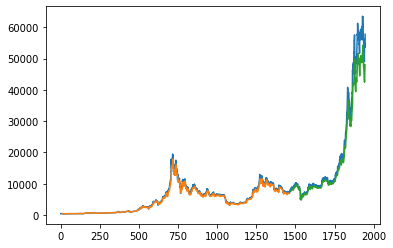

In [28]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [29]:
len(test_data)


487

In [30]:
x_input=test_data[387:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.793516]
101
1 day input [0.51697631 0.50211831 0.50563016 0.50684993 0.51007228 0.4762216
 0.52426707 0.53773402 0.53699175 0.51869622 0.52539285 0.55664308
 0.58771416 0.57906619 0.59836076 0.61612635 0.61038396 0.72589114
 0.73039929 0.7056457  0.7530196  0.74661343 0.74028877 0.76581609
 0.75358543 0.77345923 0.82016776 0.81273638 0.87938819 0.88273615
 0.90554962 0.85276738 0.76751292 0.78146475 0.74010403 0.72816067
 0.72576424 0.70912351 0.78029128 0.76045805 0.79465642 0.76334339
 0.7691423  0.76890596 0.80524335 0.82171221 0.86253627 0.88129534
 0.90974955 0.90225761 0.96420012 0.93346216 0.87969017 0.89390799
 0.92662926 0.9106016  0.91832632 0.9178035  0.90528794 0.85786449
 0.8611873  0.8300706  0.81312228 0.86749668 0.8807404  0.88037984
 0.90887967 0.92737047 0.92738852 0.93019147 0.93476082 0.9065624
 0.92485006 0.92959074 0.9158826  0.88193501 0.9179668  0.91671638
 0.94123735 0.94775834 0.94282458 1.         0.99376358 0.99699953
 0.969422   0.95534248 0.88458388 0.8

In [33]:
day_new=np.arange(1,101)
day_pred=np.arange(101,134)

In [34]:
len(df1)


1947

In [35]:
lst_output=scaler.inverse_transform(lst_output)

In [36]:
lst_output

array([[50466.23719629],
       [47623.92168254],
       [43903.09657367],
       [40253.45213308],
       [36986.35203799],
       [34218.24295426],
       [31968.04341945],
       [30194.69301898],
       [28824.15091179],
       [27769.90063477],
       [26946.86521967],
       [26279.86163799],
       [25707.81955588],
       [25185.04394986],
       [24680.49065513],
       [24175.81316868],
       [23662.74521486],
       [23140.32524874],
       [22612.24138784],
       [22084.60536979],
       [21564.17058937],
       [21057.14475054],
       [20568.4710598 ],
       [20101.50645677],
       [19658.02914098],
       [19238.42297771],
       [18841.99174071],
       [18467.26582804],
       [18112.34473015],
       [17775.14353163]])

In [37]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(lst_output,df4))

20433.236539418132

In [38]:
df4

0     57828.05063
1     56631.07741
2     57200.29122
3     53333.53775
4     57424.00595
5     56396.51416
6     57356.40188
7     58803.77581
8     58232.31614
9     55859.79754
10    56704.57306
11    49150.53388
12    49716.19160
13    49880.53342
14    46760.18656
15    46456.05847
16    43537.51139
17    42909.40093
18    37002.44047
19    40782.73826
20    37304.69067
21    37536.63111
22    34770.58362
23    38705.97864
24    38402.22385
25    39294.19738
26    38436.96854
27    35697.60639
28    34616.06800
29    35678.12920
Name: BTC price , dtype: float64

In [39]:
math.sqrt(mean_squared_error(lst_output,df4))

20433.236539418132

In [40]:
##

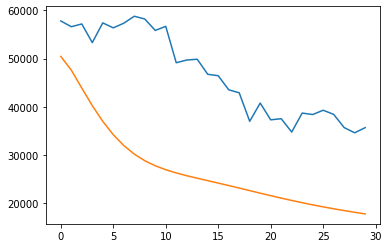

In [41]:
# plot baseline and predictions
plt.plot(df4)
plt.plot(lst_output)
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(lst_output, df4, squared=False)

In [43]:
rms

20433.236539418132

In [44]:
#21960.369462329087
#14900.825843176995

